In [185]:
import tensorflow as tf
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import matplotlib.pyplot as plt 

%config InlineBackend.figure_format = 'svg'

In [279]:
learning_rate = 0.01
epochs = 100000
display_step = 1000
n_samples=1000

In [280]:
train_X_1 = np.random.randint(low=1, high=1000, size=n_samples)
train_X_2 = np.random.randint(low=1, high=5000, size=n_samples)

train_Y = train_X_1 + train_X_2 
# print('train_X',train_X_1)
# print(train_Y)

In [281]:
train_X_1 = np.random.uniform(1.0, 10.5, size=(1, n_samples))
train_X_2 = np.random.uniform(1.0, 10.5, size=(1, n_samples))
train_Y = train_X_1 + train_X_2 

print(train_X_1)
print('+++++++', '\n')
print(train_X_2)
print('+++++++', '\n')

print(train_Y)

[[ 5.39739388 10.41381757  7.86107059  8.38683125  8.50699507  4.40664208
   4.72958299  7.8046341   7.04662496  5.77560758  2.73615479  7.72648214
   6.21047851 10.18856366  5.85945705 10.48064254  5.77879286  7.81953514
   2.95049082  4.00351706  6.99841648  4.02856144  6.35203274  9.83603923
   8.21275608  4.6230384   4.0207596   5.5974686   4.74603782  6.55323885
   9.95025635  4.89668054  2.77973507  7.65636138  9.09887619  7.69773739
   2.99306876  8.91121505  1.78092927  5.56921616  7.81142801  1.44072602
   3.02286398  6.45249522  9.05669134 10.3763498   4.70409381  8.57188692
   3.79541086  1.80128357  3.78217012  4.23734489  8.32014856  1.37533973
   4.17241269  2.38136638  7.77626564  4.90761888  6.24486818  2.91843976
   7.2560046   7.55468102  4.37888898  3.4065386   3.08038165 10.2922175
   3.3948292   2.32089718  4.20858987 10.00743914  3.37403067  8.81221828
   7.40603498  6.87555711  2.39515535  6.91521715  1.59501808  1.5243539
   9.32053636  4.71421406  5.96496184  3

<IPython.core.display.Javascript object>


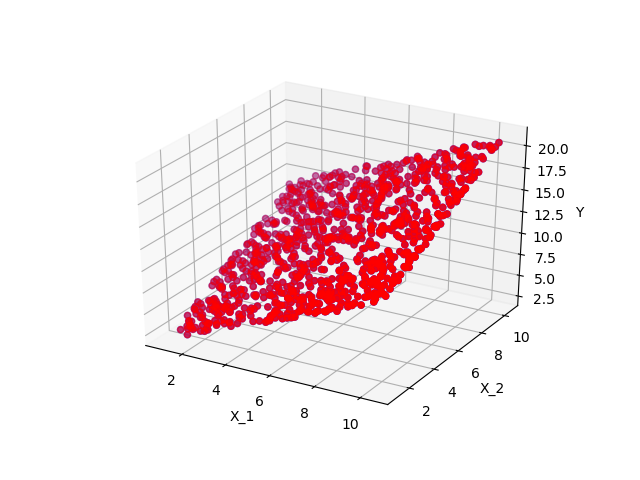

In [282]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_X_1,train_X_2,train_Y, c='b')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y' )
ax.scatter(train_X_1,train_X_2,train_X_1+train_X_2,c='r')
plt.show()

In [228]:
X_1 = tf.placeholder(tf.float32)
X_2 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W_1 = tf.Variable(np.random.randn(), name="weight_1")
W_2 = tf.Variable(np.random.randn(), name="weight_2")
B = tf.Variable(np.random.randn(), name="bias")

In [283]:
pred = W_1*X_1 + W_2*X_2 + B

cost = tf.reduce_sum((pred - Y)**2)/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [284]:
init = tf.global_variables_initializer()

In [286]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(epochs):
        for (x_1, x_2, y) in zip(train_X_1, train_X_2, train_Y):
            sess.run(optimizer, feed_dict={X_1: x_1, X_2: x_2, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X_1: x_1, X_2: x_2, Y: y})
            print ('Epoch:', '%04d' % (epoch+1), 'cost=', "{:.15f}".format(c), 'W_1=', sess.run(W_1),'W_2=', sess.run(W_2), 'b=', sess.run(B))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X_1: x_1, X_2: x_2, Y: y})
    print ("Training cost=", training_cost, "W_1=", sess.run(W_1),"W_2=", sess.run(W_2), "b=", sess.run(B), '\n')

Epoch: 1000 cost= 0.003548753913492 W_1= 1.0202528 W_2= 1.0201408 b= -0.25859776
Epoch: 2000 cost= 0.000435348978499 W_1= 1.0070934 W_2= 1.0070546 b= -0.09057438
Epoch: 3000 cost= 0.000053405998187 W_1= 1.0024846 W_2= 1.0024707 b= -0.031724185
Epoch: 4000 cost= 0.000006551716069 W_1= 1.0008702 W_2= 1.0008653 b= -0.011111499
Epoch: 5000 cost= 0.000000803986438 W_1= 1.0003048 W_2= 1.0003031 b= -0.0038918152
Epoch: 6000 cost= 0.000000098625137 W_1= 1.0001068 W_2= 1.0001062 b= -0.0013634012
Epoch: 7000 cost= 0.000000012140138 W_1= 1.0000374 W_2= 1.0000372 b= -0.00047757558
Epoch: 8000 cost= 0.000000001503458 W_1= 1.0000132 W_2= 1.0000131 b= -0.0001681487
Epoch: 9000 cost= 0.000000000194903 W_1= 1.0000048 W_2= 1.0000048 b= -6.072116e-05
Epoch: 10000 cost= 0.000000000027927 W_1= 1.0000018 W_2= 1.0000018 b= -2.2786713e-05
Epoch: 11000 cost= 0.000000000006088 W_1= 1.0000008 W_2= 1.0000008 b= -1.0019069e-05
Epoch: 12000 cost= 0.000000000002479 W_1= 1.0000006 W_2= 1.0000006 b= -6.8709687e-06
Epo

Epoch: 99000 cost= 0.000000000001431 W_1= 1.0000004 W_2= 1.0000004 b= -4.2906986e-06
Epoch: 100000 cost= 0.000000000001474 W_1= 1.0000004 W_2= 1.0000004 b= -4.2930624e-06
Optimization Finished!
Training cost= 1.4736089e-12 W_1= 1.0000004 W_2= 1.0000004 b= -4.2930624e-06 

